<a href="https://colab.research.google.com/github/j-buss/wi-dpi-analysis/blob/development/eda/wi_dpi_all_staff_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary and Education in Wisconsin

This notebook is intended to describe analysis on salaries of teachers within the Wisconsin Department of Public Instruction.

## Preparation

### Load libraries
Only needed to load data to BigQuery

In [0]:
!pip install gcsfs
!pip install pandas-gbq -U
import gcsfs

### Import Libraries

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.cloud import bigquery

In [0]:
%matplotlib inline
plt.style.use('bmh')

In [0]:
project_id='wi-dpi-010'
raw_data_bucket_name='landing-009'
source_name='all_staff_report'
year='2017_2018'
filename='AllStaffReportPublic__04152019_194414.csv'
full_filename=raw_data_bucket_name + '/' + source_name + '/' + year + '/' + filename

dataset_name='landing'
table_name=source_name
landing_bq_fullname=dataset_name + '.' + table_name



### Functions

In [0]:
def create_dataset(client, project_id, dataset_name):
  
  
  dataset_id = "{}.{}".format(project_id, dataset_name)
  dataset = bigquery.Dataset(dataset_id)
  dataset.location = "US"

  dataset = client.create_dataset(dataset)
  print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

### Load Data

Data can be retrieved from the GCP Bucket.

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

In [0]:
client = bigquery.Client(project_id)

In [0]:
create_dataset(client, project_id, dataset_name)

In [0]:
fs = gcsfs.GCSFileSystem(project=project_id)
with fs.open(full_filename) as f:
  df = pd.read_csv(f, skiprows=1)

In [0]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.to_gbq(landing_bq_fullname,project_id=project_id,if_exists='replace')

1it [00:04,  4.81s/it]


# Exploratory Data Analysis

The following fields are Integers; but have Nulls in the columns. 

As such they are loaded as floats:

1.  entity_id
2.  assignment_work_cesa_number
3.  district_mailing_po_box


In [0]:
query = '''
  SELECT
    *
  FROM
    [{project}.{dataset}.{table}]
 '''.format(project=project_id, dataset=dataset_name, table=table_name)

In [5]:
df = pd.io.gbq.read_gbq(query, project_id=project_id, reauth=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value for dialect is changing to "standard" in a future version of pandas-gbq. Pass in dialect="legacy" to disable this warning.
  """Entry point for launching an IPython kernel.


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=495642085510-k0tmvj2m941jhre2nbqka17vqpjfddtd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=I0KdD9uo4JFvAdVqlj5tqJOBjEgZUJ&prompt=consent&access_type=offline
Enter the authorization code: 4/NQEpA1-dYoMepJkmYoAkuejpJSidObHQt6c2TnBifY2uoxvTGYN97sc


In [6]:
df.head()

,research_id,school_year,last_name,first_name,entity_id,gender,raceethnicity,birth_year,contract_hire_agency,contract_high_degree,...,school_mailing_street_address,school_mailing_po_box,school_mailing_city,school_mailing_state,school_mailing_zip_code,district_mailing_street_address,district_mailing_po_box,district_mailing_city,district_mailing_state,district_mailing_zip_code
0,90313,2018,Anderson,Gayle,673393.0,F,W - White,1948,None,None,...,755 Scheuring Rd,None,De Pere,WI,54115.0,755 Scheuring Rd,NaN,De Pere,WI,54115
1,23255,2018,Boudreau,Jennifer,440950.0,F,W - White,1967,None,None,...,755 Scheuring Rd,None,De Pere,WI,54115.0,755 Scheuring Rd,NaN,De Pere,WI,54115
2,148857,2018,Burkard,Brenda,808929.0,F,W - White,1971,None,None,...,755 Scheuring Rd,None,De Pere,WI,54115.0,755 Scheuring Rd,NaN,De Pere,WI,54115
3,78347,2018,Doucette,Patrick,57697.0,M,W - White,1951,None,None,...,755 Scheuring Rd,None,De Pere,WI,54115.0,755 Scheuring Rd,NaN,De Pere,WI,54115
4,40518,2018,Fossen-Rades,Christine,53515.0,F,W - White,1969,None,None,...,755 Scheuring Rd,None,De Pere,WI,54115.0,755 Scheuring Rd,NaN,De Pere,WI,54115


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187344 entries, 0 to 187343
Data columns (total 44 columns):
research_id                        187344 non-null int64
school_year                        187344 non-null int64
last_name                          187344 non-null object
first_name                         187344 non-null object
entity_id                          142718 non-null float64
gender                             187344 non-null object
raceethnicity                      187344 non-null object
birth_year                         187344 non-null int64
contract_hire_agency               107926 non-null object
contract_high_degree               107898 non-null object
contract_days                      107926 non-null float64
contract_local_experience          107926 non-null float64
contract_total_experience          107926 non-null float64
total_salary                       107926 non-null object
total_fringe                       107898 non-null object
assignment_area   

In [9]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
#del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: school_mailing_po_box, district_mailing_po_box, 



count      107926
unique      22467
top       $77,701
freq          673
Name: total_salary, dtype: object


AttributeError: ignored

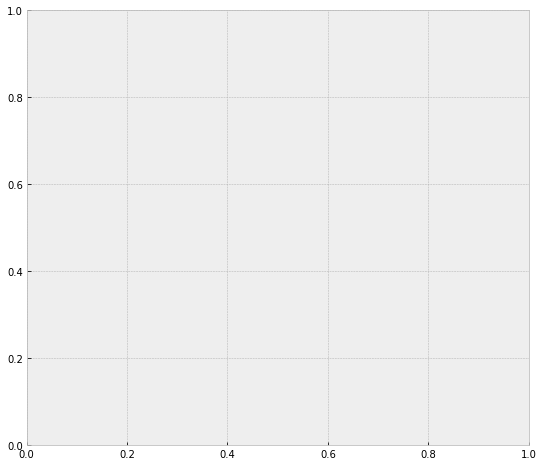

In [16]:
print(df['total_salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['total_salary'], color='g', bins=100);